In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [3]:
from fastai.vision.all import *

In [6]:
path = Path('/kaggle/input')
path.ls()

(#1) [Path('/kaggle/input/chest-xray-pneumonia')]

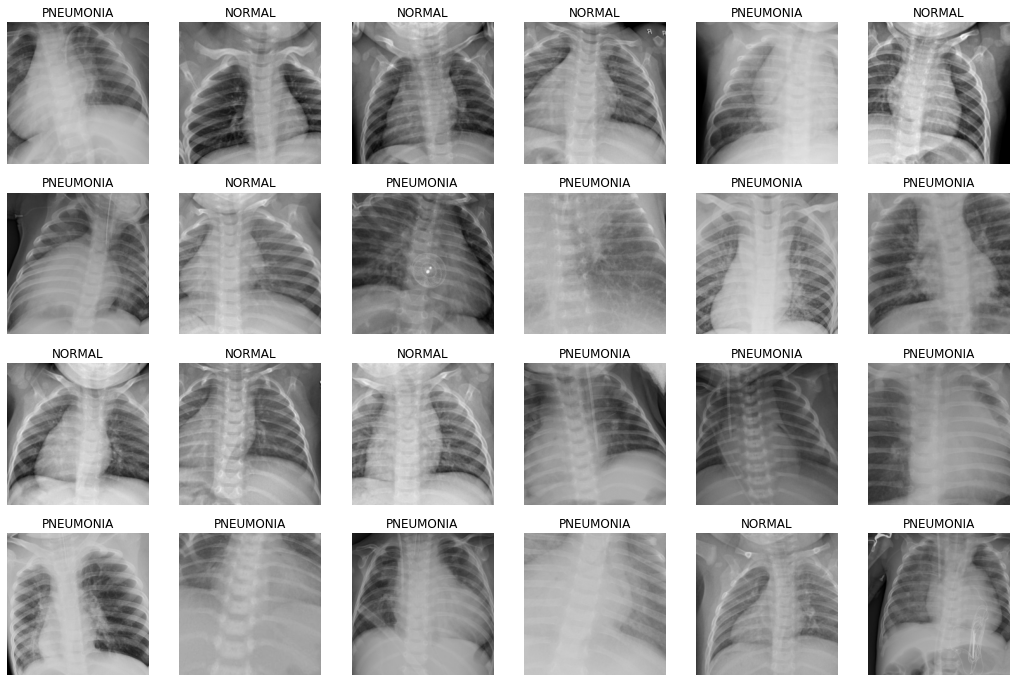

In [9]:
def get_dls(bs, size):
    dset = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items=get_image_files,
                     splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                     get_y=parent_label, item_tfms=Resize(460),
                     batch_tfms = aug_transforms(size=size, min_scale=0.75))
    return dset.dataloaders(path, bs=bs)

dls = get_dls(64, 224)
dls.show_batch(max_n=24)

In [10]:
dls.vocab

['NORMAL', 'PNEUMONIA']

In [11]:
len(dls.train_ds), len(dls.valid_ds)

(10432, 1248)

In [12]:
len(dls.train_ds), len(dls.valid_ds)

(10432, 1248)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

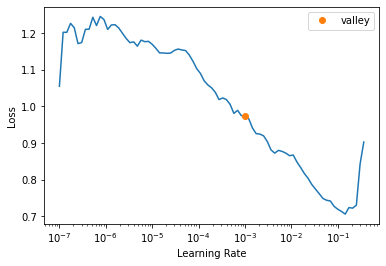

In [13]:
model_dlr = vision_learner(dls, resnet50, metrics=accuracy)
model_dlr.lr_find()

In [14]:
model_dlr.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.271131,0.430179,0.903846,07:07
1,0.135170,0.275658,0.911859,06:58
2,0.103506,0.233364,0.924679,05:12


SuggestedLRs(valley=8.31763736641733e-06)

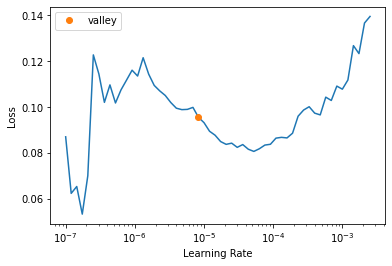

In [15]:
model_dlr.unfreeze()
model_dlr.lr_find()

In [16]:
model_dlr.fit_one_cycle(7, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.085749,0.230449,0.929487,04:27
1,0.071844,0.238266,0.927885,04:28
2,0.065012,0.216703,0.935897,04:28
3,0.062367,0.211761,0.934295,04:27
4,0.052301,0.205052,0.939103,04:27
5,0.043057,0.262168,0.921474,04:29
6,0.053331,0.202644,0.939103,04:27


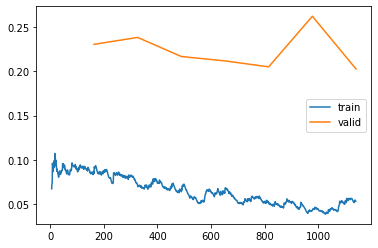

In [17]:
model_dlr.recorder.plot_loss()

Progressive Resizing

In [18]:
dls = get_dls(128, 128)
model_pr = Learner(dls, xresnet50(n_out=dls.c), 
                   loss_func=CrossEntropyLossFlat(),
                   metrics=accuracy)
model_pr.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.253777,1.760343,0.583333,04:13
1,0.198916,0.472867,0.817308,04:13
2,0.143749,0.362328,0.854167,04:13
3,0.110577,0.308494,0.892628,04:12


In [19]:
model_pr.dls=get_dls(64, 224)
model_pr.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.181170,0.588459,0.786859,04:29


epoch,train_loss,valid_loss,accuracy,time
0,0.130189,0.396470,0.870192,04:29
1,0.135878,0.413308,0.812500,04:29
2,0.115123,0.356711,0.884615,04:30
3,0.093082,0.322123,0.894231,04:31
4,0.074930,0.258360,0.913462,04:29


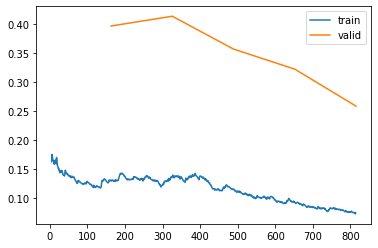

In [20]:
model_pr.recorder.plot_loss()

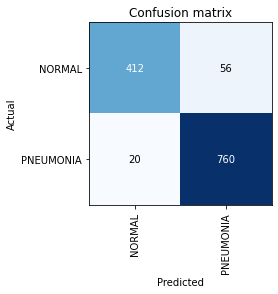

In [23]:
interp1= ClassificationInterpretation.from_learner(model_dlr)
interp1.plot_confusion_matrix()

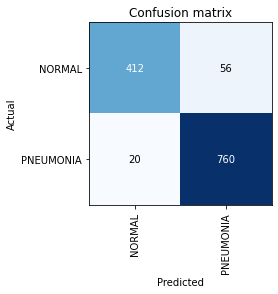

In [22]:
interp2= ClassificationInterpretation.from_learner(model_dlr)
interp2.plot_confusion_matrix()

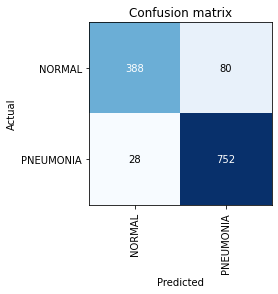

In [24]:
interp3= ClassificationInterpretation.from_learner(model_pr)
interp3.plot_confusion_matrix()

In [49]:
model_dlr.export("nimonia.pkl")
model_dlr.save("nimonia")

In [53]:
from IPython.display import FileLink
FileLink(r'nimonia.pkl')

/kaggle/working/nimonia.pkl

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
